# OrionMonoceros test with method 1

In [1]:
%matplotlib inline

import os
import sys
import copy
import numpy as np

# filtering Astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

sys.path.append('../lib/')
from hdmclouds_v1 import *
from utils import *
from graph import *
from preprocessing import *
from gmr import *

from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider
import matplotlib
import matplotlib.pyplot as plt; plt.show()
matplotlib.rcParams.update({'font.size': 13})

#from pycupid import *
def load_data(fits_path):
    hdu = fits.open(fits_path)[0]
    data = hdu.data
    wcs = WCS(hdu.header)

    if data.ndim>3:
        # droping out the stokes dimension
        data = np.ascontiguousarray(data[0])
        wcs = wcs.dropaxis(3)

        if data.shape[0]==1:
            # in case data is not a cube but an image
            data = np.ascontiguousarray(data[0])
            wcs = wcs.dropaxis(2)
    
    # in case NaN values exist on data
    mask = np.isnan(data)
    if np.any(mask): data = ma.masked_array(data, mask=mask)

    return data,wcs,hdu

save_path = "/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/HDMC-v1/figures/"

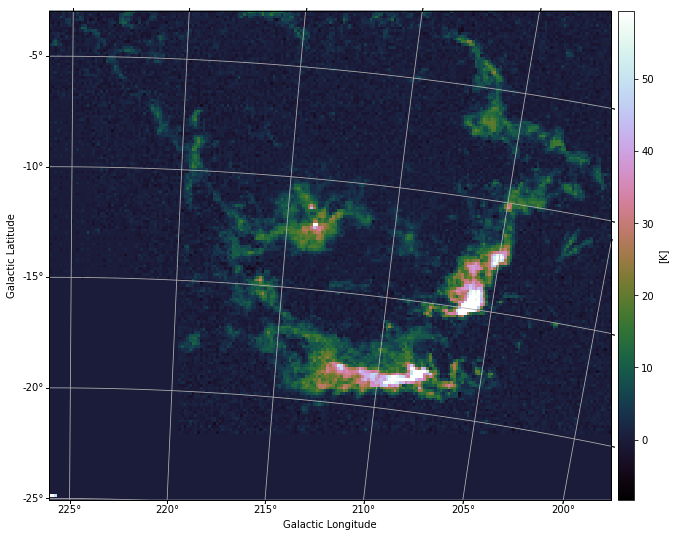

In [2]:
#fits_path = '../data/images/Orion.cont.image.fits'
#fits_path = '../data/images/OphA_ExtnCambR_F.fits'
#fits_path = '../data/images/PerA_Extn2MASS_F_Gal.fits'
#fits_path = '../data/images/RhoOphiuchus60.fits'
#fits_path = '../data/images/perseus60.fits'
fits_path = '../data/SCIMES/orion_12CO_mom0.fits'

data,wcs,hdu = load_data(fits_path)
base_level = estimate_rms(data)
image_plot(data, wcs=wcs, unit=hdu.header["BUNIT"], save_path="./orion_12CO_mom0.png")

In [3]:
preprocessing(data, wcs)

interactive(children=(FloatSlider(value=6.833755925097559, description='back_level', max=13.667511850195117, m…

[INFO] Number of pixels with significant emission: 6013
[INFO] Level of compression: 4.989190088142358%
[INFO] Number of ICEs: 14
Isolated Cloud Entity A: 4359 pixels of significant emission.
Isolated Cloud Entity B: 44 pixels of significant emission.
Isolated Cloud Entity C: 31 pixels of significant emission.
Isolated Cloud Entity D: 41 pixels of significant emission.
Isolated Cloud Entity E: 169 pixels of significant emission.
Isolated Cloud Entity F: 71 pixels of significant emission.
Isolated Cloud Entity G: 295 pixels of significant emission.
Isolated Cloud Entity H: 743 pixels of significant emission.
Isolated Cloud Entity I: 27 pixels of significant emission.
Isolated Cloud Entity J: 34 pixels of significant emission.
Isolated Cloud Entity K: 120 pixels of significant emission.
Isolated Cloud Entity L: 21 pixels of significant emission.
Isolated Cloud Entity M: 24 pixels of significant emission.
Isolated Cloud Entity N: 34 pixels of significant emission.


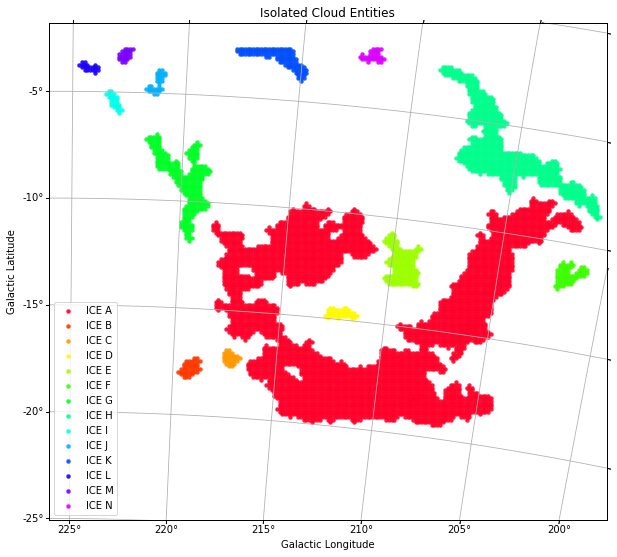

####################################################################################################


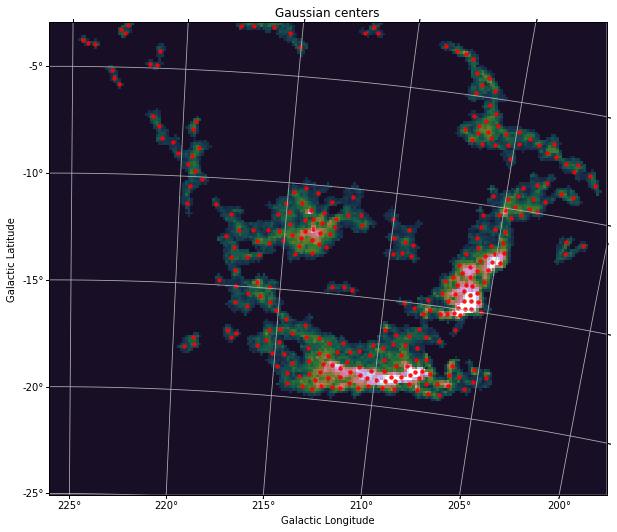

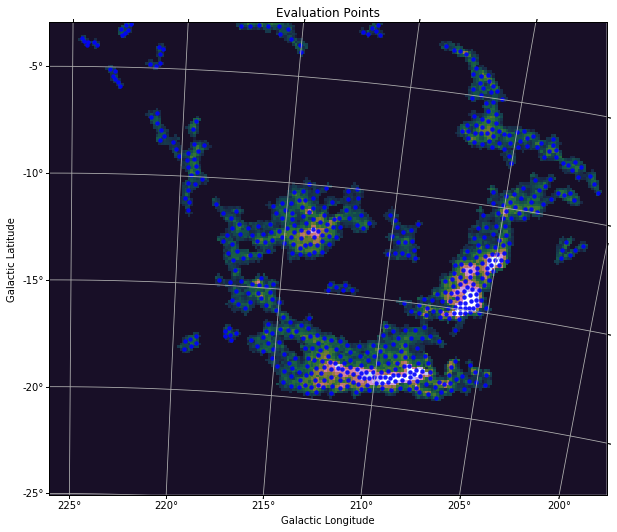

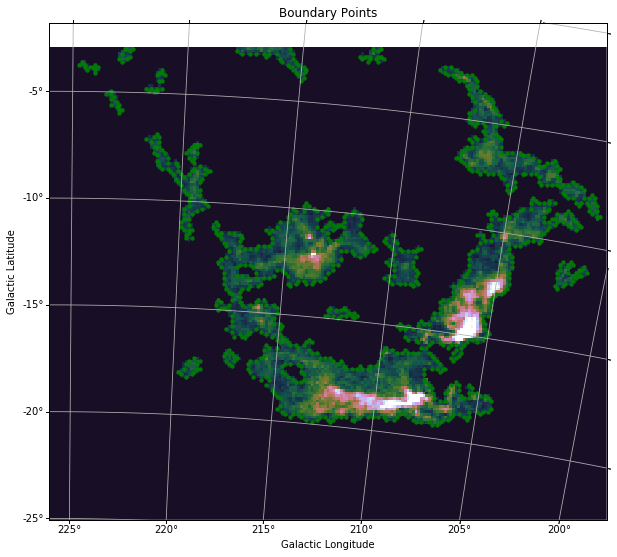

In [4]:
hdmc = HDMClouds(data, back_level=1.5, wcs=wcs, verbose=True, n_gaussians=300)

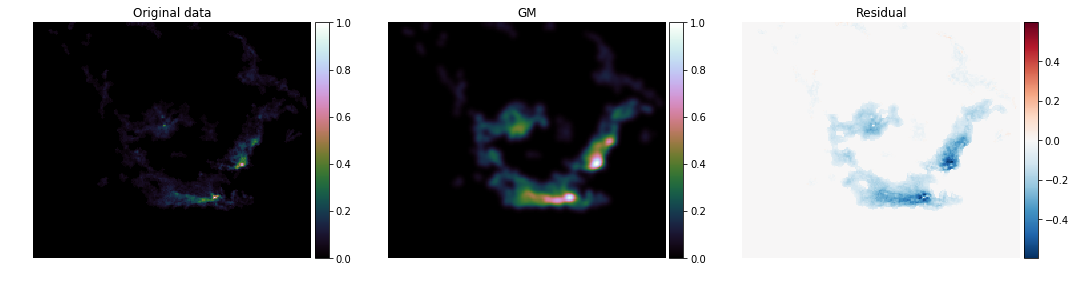

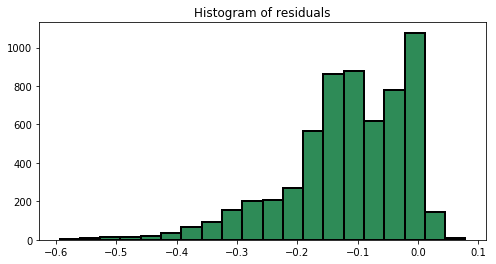

RESIDUAL STATS
RMS of residual: 0.06191988249865485
Inf norm of residual: 0.5942242884671651
Variance of residual: 0.003478832881597171
Normalized flux addition: 1.6411483246469
Normalized flux lost: 0.0111590854775702


In [5]:
hdmc.get_residual_stats();

In [6]:
%%prun -s tottime -q -l 30 -T hdmc_m1.prof
hdmc.build_gmr()

---------------------------------------------
Building GM for Isolated Cloud Entity A
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.026762770608381007
Inf norm of residual: 0.4159504623542276
Variance of residual: 0.0006884232769067673
Normalized flux addition: 0.1419579354414278
Normalized flux lost: 0.07554680050443015


---------------------------------------------
Building GM for Isolated Cloud Entity B
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.009716095982527942
Inf norm of residual: 0.030295095091575512
Variance of residual: 9.403113049056152e-05
Normalized flux addition: 0.0687405535947474
Normalized flux lost: 0.08143920537860048


---------------------------------------------
Building GM for Isolated Cloud Entity C
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.010214550386635676
Inf norm of residual: 0.030051643880169253
Variance of residual: 0.00010028691763055776
Normali

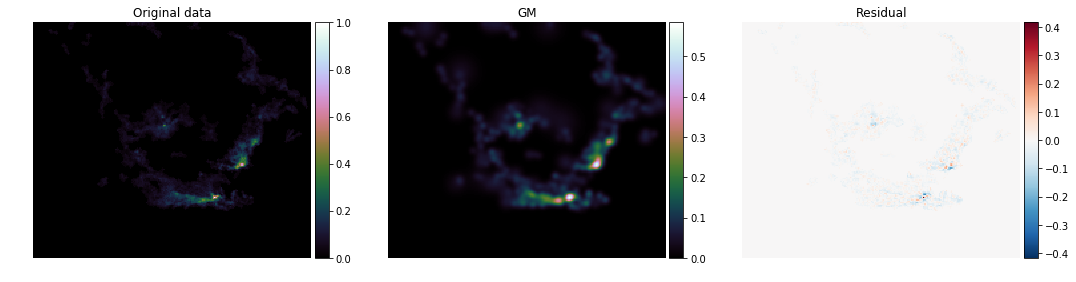

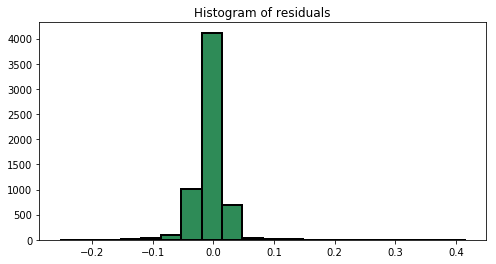

RESIDUAL STATS
RMS of residual: 0.009717207337356683
Inf norm of residual: 0.4159504623542276
Variance of residual: 9.379579295086767e-05
Normalized flux addition: 0.1447397953357549
Normalized flux lost: 0.07618832471825666


In [7]:
hdmc.get_residual_stats();

In [8]:
print("Elapsed time {0}".format(hdmc.elapsed_time))

Elapsed time 149.9228391647339


In [9]:
w,sig = hdmc.get_params()

print("PARAMETERS VARIATION:")
print("w variation: ",np.max(np.abs(hdmc.w0-w)))
print("sig variation: ",np.max(np.abs(hdmc.sig0-sig)))

PARAMETERS VARIATION:
w variation:  0.35453542327880355
sig variation:  0.02787317275134474


#### Profiling results

In [10]:
print(open('hdmc_m1.prof', 'r').read())

         664047 function calls in 149.923 seconds

   Ordered by: internal time
   List reduced from 109 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   219250  102.949    0.000  102.949    0.000 {fgm_eval.gm_eval2d_2}
       14   36.338    2.596  149.857   10.704 {built-in method scipy.optimize._minpack._lmdif}
   109618    6.137    0.000  113.528    0.001 hdmclouds_v1.py:919(F)
   109646    3.296    0.000    3.296    0.000 utils.py:150(sig_mapping)
   109634    1.101    0.000    1.101    0.000 {built-in method numpy.core.multiarray.concatenate}
   109724    0.056    0.000    0.056    0.000 {built-in method builtins.len}
       12    0.016    0.001    0.018    0.001 basic.py:907(inv)
       24    0.011    0.000    0.011    0.000 {built-in method numpy.core.multiarray.dot}
      286    0.004    0.000    0.004    0.000 socket.py:334(send)
       12    0.002    0.000    0.002    0.000 {method 'outer' of 'numpy.ufunc' objects}
    

***

### Building the hierarchical tree

In [20]:
hdiceC = hdmc.hdice_dict["C"]

In [22]:
hdiceC.center_points

array([[0.28314845, 0.3260166 ],
       [0.2945034 , 0.3193689 ],
       [0.28923237, 0.33572981]])

In [23]:
hdiceC.eval_points

array([[0.27806972, 0.3267972 ],
       [0.28463693, 0.31589232],
       [0.28721897, 0.32539096],
       [0.28923237, 0.33572981],
       [0.29388163, 0.3160784 ],
       [0.2985926 , 0.32240661]])

In [36]:
hdiceC.build_htree()

[[0.28314845 0.3260166 ]
 [0.2945034  0.3193689 ]
 [0.28923237 0.33572981]]


Maxsig 0.06607215694666745
[[         1          2]
 [         2 2147483647]
 [2147483647 2147483647]]
1000
[[0.02820848 0.03034995]
 [0.01363698        inf]
 [       inf        inf]]
reducing
[0 1 2]
[[0.02820848 0.03034995]
 [0.01363698        inf]
 [       inf        inf]]
[[         2          1]
 [         2 2147483647]
 [2147483647 2147483647]]
##################################################
[0 1]
[[-1.        -1.       ]
 [ 0.0378521        inf]]
[[        -1         -1]
 [         0 2147483647]]
##################################################


({1: (3, 2), 0: (1, 4)},
 {(3, 2): 1, (1, 4): 0},
 {4: [0], 3: [1], 2: [2], 1: [1, 2], 0: [1, 2, 0]})

***

In [38]:
hdiceJ = hdmc.hdice_dict["J"]

In [17]:
hdice.center_points

array([[0.76972395, 0.19421118],
       [0.77253871, 0.18091895],
       [0.79590742, 0.19994603]])

In [18]:
hdice.eval_points

array([[0.76814167, 0.1923013 ],
       [0.77253871, 0.18091895],
       [0.77457083, 0.20006155],
       [0.79007198, 0.19888439],
       [0.80223849, 0.19763667],
       [0.79879746, 0.20534739]])

In [39]:
mu = hdiceJ.center_points

In [37]:
hdice.build_htree()

[[0.76972395 0.19421118]
 [0.77253871 0.18091895]
 [0.79590742 0.19994603]]


Maxsig 0.021889098371958383
[[         1]
 [2147483647]
 [2147483647]]
1000
[[0.00961499]
 [       inf]
 [       inf]]
reducing
[0 1 2]
[[0.00961499]
 [       inf]
 [       inf]]
[[         1]
 [2147483647]
 [2147483647]]
##################################################
[0 2]
[[inf]
 [inf]]
[[2147483647]
 [2147483647]]
##################################################


KeyError: -1

In [11]:
hdmc.build_hierarchical_tree()

Building the hierarchical tree for Isolated Cloud Entity A
DONE

Building the hierarchical tree for Isolated Cloud Entity B
DONE

Building the hierarchical tree for Isolated Cloud Entity C
DONE

Building the hierarchical tree for Isolated Cloud Entity D
DONE

Building the hierarchical tree for Isolated Cloud Entity E
DONE

Building the hierarchical tree for Isolated Cloud Entity F
DONE

Building the hierarchical tree for Isolated Cloud Entity G
DONE

Building the hierarchical tree for Isolated Cloud Entity H
DONE

Building the hierarchical tree for Isolated Cloud Entity I
DONE

Building the hierarchical tree for Isolated Cloud Entity J
[0 2]
[[inf]
 [inf]]
[[2147483647]
 [2147483647]]
##################################################


KeyError: -1

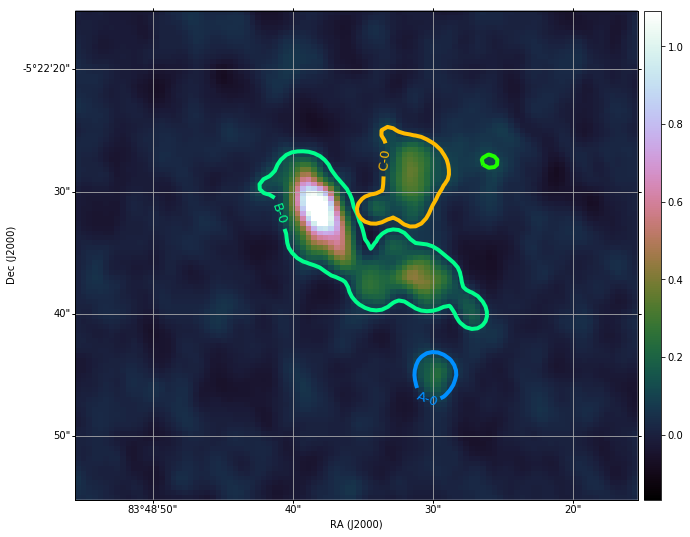

In [13]:
gp.ce_plot(hdmc, wcs=hdmc.wcs)

In [14]:
hdmc.visualize()

interactive(children=(Text(value='', description='split'), Text(value='', description='join1'), Text(value='',…

***